In [92]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
sys.path.append(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\modelling")
sys.path.append(r"C:\Users\ge85rek\Desktop\Fabry-Perot\modelling")
import read_csv, T_and_R
#data = read_csv.read_csv(r"/Users/alex/Desktop/Fabry-Perot/data/InGaN_FTIR.csv") #MacOS
#data = read_csv.read_csv(r"C:\Users\ge85rek\Desktop\Fabry-Perot\data\InGaN_FTIR.csv") #Labor
data = read_csv.read_csv(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\data\InGaN_FTIR.csv") # PC

In [93]:
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0][::-1]) * 100
wavelength = scipy.constants.c/frequenz

In [94]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    end = (np.abs(array - value)).argmin()
    return end

def flatten(data, N = 1200, cutdown = None, cutup = None):
    smooth = np.convolve(data, np.ones(N)/N, mode='same')
    return smooth[cutdown:cutup], data[cutdown:cutup]-smooth[cutdown:cutup]

def länge(m,n,f):
    lam = scipy.constants.c/f
    return m * lam / (2 * n)

def calculate_m(min_frequenz_array):
    lambda_array = [scipy.constants.c/f for f in min_frequenz_array]
    m_array = []
    for i in range(0,len(lambda_array)-1):
        m_array.append(lambda_array[i+1]/(lambda_array[i]-lambda_array[i+1]))
    return m_array

def calculate_m_looking_back(min_frequenz_array):
    lambda_array = [scipy.constants.c/f for f in min_frequenz_array]
    m_array = []
    for i in range(1,len(lambda_array)):
        m_array.append(lambda_array[i-1]/(lambda_array[i-1]-lambda_array[i]))
    return m_array

def polynomial(x,a0,a1,a2,a3,a4, a5, a6):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 

def sine(x,k,A,phi):
    return A*np.sin(k*x-phi)

def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

def fit_individually(xlim_lower_value,xlim_upper_value,x_dataset,y_dataset, p0 = [1,1,1,1,1,1,1]):
    x_lim_lower = find_nearest(x_dataset,xlim_lower_value)
    x_lim_upper = find_nearest(x_dataset,xlim_upper_value)
    x_data_modified = x_dataset[x_lim_lower:x_lim_upper]
    y_data_modified = y_dataset[x_lim_lower:x_lim_upper]
    params_fit, cov_fit = scipy.optimize.curve_fit(polynomial,x_data_modified,y_data_modified, p0 = p0)
    fitfunc = polynomial(x_data_modified,*params_fit)
    min_fit_index = scipy.signal.argrelmin(fitfunc, order = 500)
    min_fit_frequenz = x_data_modified[min_fit_index]
    min_fit_absorption = fitfunc[min_fit_index]
    plt.plot(x_data_modified,y_data_modified)
    plt.plot(min_fit_frequenz,min_fit_absorption, "ro")
    plt.plot(x_data_modified,fitfunc)
    return min_fit_frequenz, min_fit_absorption

In [130]:
cutdown = find_nearest(frequenz, 0.6e14)
cutup = find_nearest(frequenz, 1.95e14)
ends = 600
frequenz_20_cut = frequenz[cutdown:cutup]
frequenz_20_no_edge = frequenz[cutdown+ends:cutup-ends]
data_Lumilog_GaN_20 = data[1][::-1][cutdown:cutup]
data_Lumilog_GaN_20_no_edge = data_Lumilog_GaN_20[ends:-ends]
Lumilog_GaN_20_smooth, Lumilog_GaN_smoothed_out = flatten(data_Lumilog_GaN_20, N = 1200)
Lumilog_GaN_20_smooth_no_edge = Lumilog_GaN_20_smooth[ends:-ends]
Lumilog_GaN_20_smoothed_out_no_edge = Lumilog_GaN_smoothed_out[ends:-ends]

In [132]:
len(frequenz)

15762

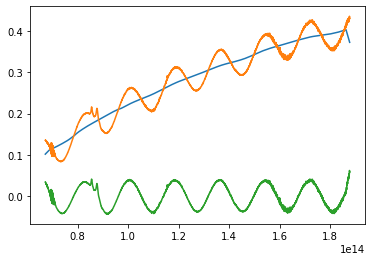

In [131]:
plt.plot(frequenz_20_no_edge, Lumilog_GaN_20_smooth_no_edge)
plt.plot(frequenz_20_no_edge, data_Lumilog_GaN_20_no_edge)
plt.plot(frequenz_20_no_edge, Lumilog_GaN_20_smoothed_out_no_edge)

c:\Users\da1qu1r1\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


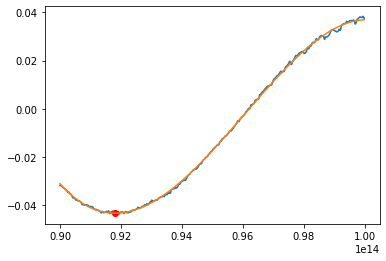

In [97]:
min_frequenz_first, min_absorption_first = fit_individually(0.9e14,1.0e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1,1,1])

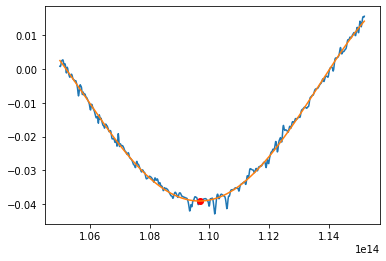

In [98]:
min_frequenz_second, min_absorption_second = fit_individually(1.05e14,1.152e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1,1,1])

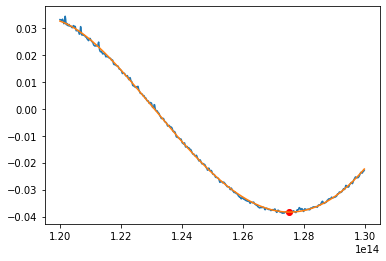

In [99]:
min_frequenz_third, min_absorption_third = fit_individually(1.2e14,1.3e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1,1,1])

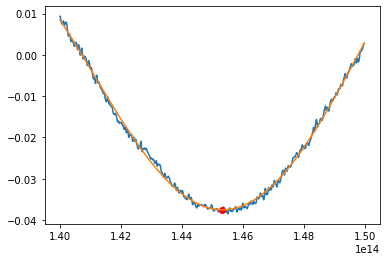

In [100]:
min_frequenz_fourth, min_absorption_fourth = fit_individually(1.4e14,1.5e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1,1,1])

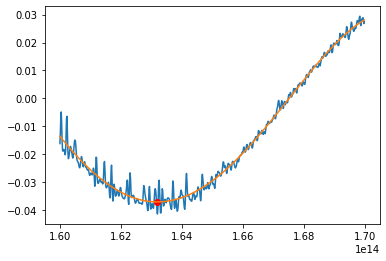

In [101]:
min_frequenz_fifth, min_absorption_fifth = fit_individually(1.6e14,1.7e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1,1,1])

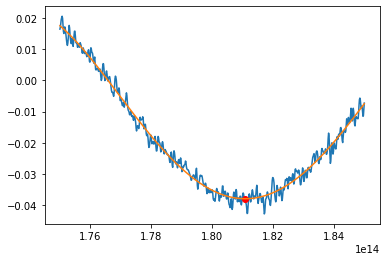

In [102]:
min_frequenz_sixth, min_absorption_sixth = fit_individually(1.75e14,1.85e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1,1,1])

In [103]:
min_frequenz_total = [min_frequenz_first, min_frequenz_second, min_frequenz_third, min_frequenz_fourth, min_frequenz_fifth, min_frequenz_sixth]
min_absorption_total = [min_absorption_first, min_absorption_second, min_absorption_third, min_absorption_fourth, min_absorption_fifth, min_absorption_sixth]

In [104]:
min_frequenz_total 

[array([9.18062397e+13]),
 array([1.09673113e+14]),
 array([1.27525531e+14]),
 array([1.45334583e+14]),
 array([1.63201456e+14]),
 array([1.81082785e+14])]

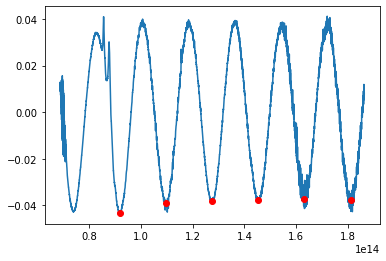

In [105]:
plt.plot(frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge)
plt.plot(min_frequenz_total,min_absorption_total, "ro")

In [106]:
m_array_total = calculate_m(min_frequenz_total)
m_array_total

[array([5.13834952]),
 array([6.14331984]),
 array([7.16071429]),
 array([8.13430419]),
 array([9.12691997])]

In [107]:
m_array_clean = np.arange(5,11)

In [108]:
n_array_total = []
for i in range(0,len(m_array_clean)):
    n_array_total.append(refractive_index(m_array_clean[i],3.5e-6,min_frequenz_total[i]))
n_array_total

[array([2.33249364]),
 array([2.34300784]),
 array([2.35084266]),
 array([2.35745647]),
 array([2.36178926]),
 array([2.36507817])]

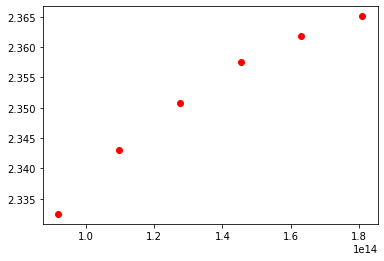

In [109]:
plt.plot(min_frequenz_total,n_array_total, "ro")

### Bei 80C

In [140]:
cutdown_80 = find_nearest(frequenz, 0.6e14)
cutup_80 = find_nearest(frequenz, 2.2e14)
ends_80 = 500
frequenz_80_cut = frequenz[cutdown_80:cutup_80]
frequenz_80_no_edge = frequenz[cutdown_80+ends_80:cutup_80-ends_80]
data_Lumilog_GaN_80 = data[2][::-1][cutdown_80:cutup_80]
data_Lumilog_GaN_80_no_edge = data_Lumilog_GaN_80[ends_80:-ends_80]
Lumilog_GaN_80_smooth, Lumilog_GaN_80_smoothed_out = flatten(data_Lumilog_GaN_80, N = 1200)
Lumilog_GaN_80_smooth_no_edge = Lumilog_GaN_80_smooth[ends_80:-ends_80]
Lumilog_GaN_80_smoothed_out_no_edge = Lumilog_GaN_80_smoothed_out[ends_80:-ends_80]

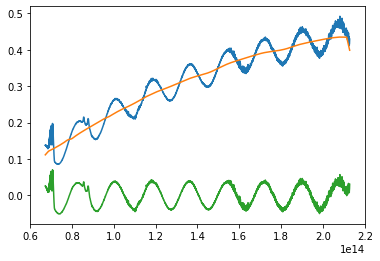

In [143]:
plt.plot(frequenz_80_no_edge, data_Lumilog_GaN_80_no_edge)
plt.plot(frequenz_80_no_edge, Lumilog_GaN_80_smooth_no_edge)
plt.plot(frequenz_80_no_edge, Lumilog_GaN_80_smoothed_out_no_edge)